# Entregável 1 - visão computacional

In [72]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.4 


# Equalização de histograma

In [73]:
rintin = cv2.imread("RinTinTin.jpg")

In [74]:
rintin.shape

(240, 320, 3)

In [75]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [76]:
rintin_gray.shape

(240, 320)

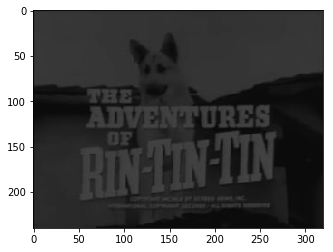

In [77]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

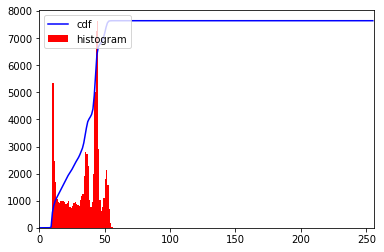

In [78]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

1. Não, pois não utiliza a faixa de modo expandido, ou seja, há um enfoque maior nas cores escuras.

2.

In [79]:
rintin_gray.max()

58

In [80]:
rintin_gray.min()

8

In [81]:
#Equação da reta

#8*a+b=0
#58*a+b=255

In [82]:
a = 255/50
b = -8*a

In [83]:
copia = rintin_gray.copy()

In [84]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        copia[i][j] = a*rintin_gray[i][j]+b

3.

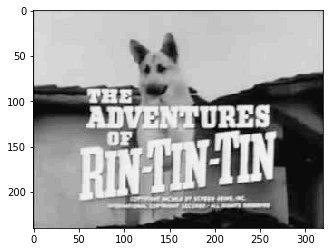

In [85]:
plt.imshow(copia, cmap="Greys_r", vmin=0, vmax=255)

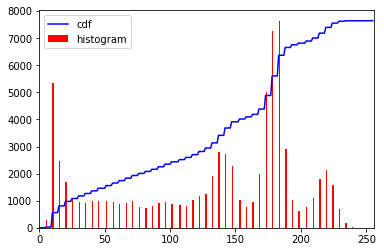

In [86]:
hist,bins = np.histogram(copia.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(copia.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [87]:
grid = cv2.imread("hall_box_battery1.jpg")

In [88]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)

Separando o canal R:

In [89]:
grid_r = grid_rgb[:,:,0]

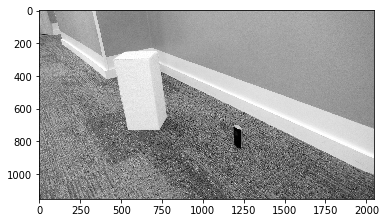

In [90]:
plt.imshow(grid_r, cmap='Greys_r')

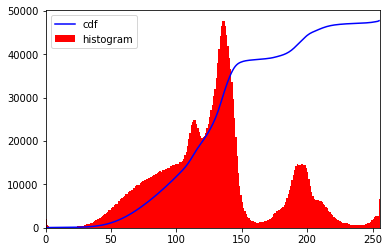

In [91]:
hist,bins = np.histogram(grid_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(grid_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Separando o canal B:

In [92]:
grid_b = grid_rgb[:,:,2]

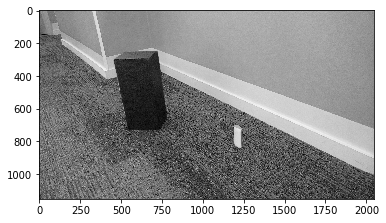

In [93]:
plt.imshow(grid_b, cmap='Greys_r')

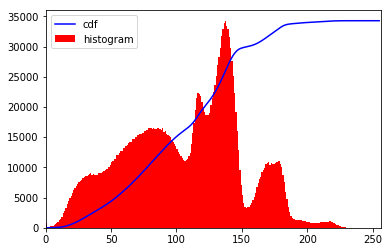

In [94]:
hist,bins = np.histogram(grid_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(grid_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

1. Não é possível identificar a caixa vermelha e a bateria azul, pois há na imagem outros elementos de cor branca, e, como o branco é a mistura de todas as cores, ainda que a caixa vermelha fique branca no canal R e a bateria azul fique branca no canal B, não dá para distinguir se a cor do rodapé é realmente branca.

2.

In [95]:
imagem = grid_rgb.copy()

In [96]:
for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
        if grid_r[i][j]>=150 and grid_b[i][j]<=100:
            imagem[i][j] = 255
        else:
            imagem[i][j] = 0

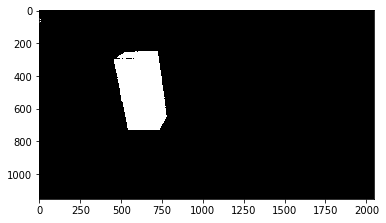

In [97]:
plt.imshow(imagem, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele.

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [98]:
imagem3 = cv2.imread("hall_box_battery_atividade3.png")

In [99]:
imagem3.shape

(576, 1024, 3)

In [100]:
imagem3_gray = cv2.cvtColor(imagem3, cv2.COLOR_BGR2GRAY)

In [101]:
imagem3_gray.shape

(576, 1024)

In [102]:
saida = imagem3_gray.copy()

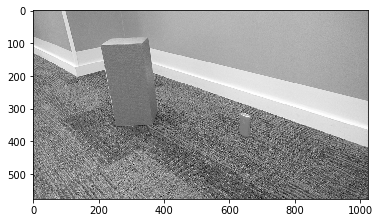

In [103]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

In [107]:
saida[:] = 0

for i in range(1,saida.shape[0]-1):
    for j in range(1,saida.shape[1]-1):
        saida[i][j] = abs(int(imagem3_gray[i+1][j]) - int(imagem3_gray[i-1][j]))

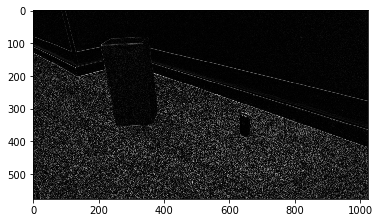

In [110]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)